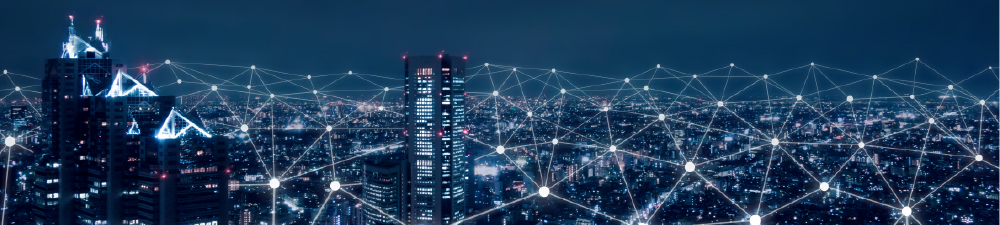

# Mini Project 3  - IU 4.6 Machine Learning

<h3><mark>[ Group 9: The Eagles ]</h3>

*Chondro Tandian, Julius Tan, Junlong Tan, Sanchita Talukdar, and Shellen Chai*

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer, roc_auc_score
from IPython.display import display, HTML

#oversampling
from imblearn.over_sampling import SMOTE

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#config for whole notebook
pd.set_option('display.max_columns', None) # This is to show all the columns whenever we display dataframes for better feature selection

In [3]:
#edit the file location of raw data set
cust_df=pd.read_csv("Mini_project_3_Data.xls") # change this to correct location of your data

# print the top few rows for intital study
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [4]:
## utility functions for this section

# This function is to return features that have null value
def df_isnull_cols(df,normalize=False):
    
    table_data=[]
    title=""
    
    if normalize:
        title='        Percentage of null values in columns\n'
        for x in df.columns:
            if df[x].isnull().sum() != 0:
                table_data.append([x,f"{df[x].isnull().sum()/len(cust_df):.5%}"])      
    else:
        title='            Total Null Values in Columns\n'
        for x in df.columns:
            if df[x].isnull().sum() != 0:
                table_data.append([x,df[x].isnull().sum()])
                         
    if table_data!=[]:
        print(title)        
        table_data.insert(0,['COLUMN NAME','SUM'])
        for row in table_data:
            print("{: >25} {: >10}".format(*row))
    else:
        print('No Null Values Found')
    print('\n')
        
# This function is to summarize compare features that have null value
def compare_value_counts(col):
    print("Comparing",col.name,"\n")
    print(pd.concat([col.value_counts(),col.value_counts(normalize=True).mul(100)],axis=1,keys=('Counts','Percentage')))
    print('\n')


In [5]:
# Identify the dimension of cust_df
print("We have",cust_df.shape[0],"rows and",cust_df.shape[1],"columns")
print("Total number of missing value is",cust_df.isna().sum().sum())


We have 51047 rows and 58 columns
Total number of missing value is 3515


In [6]:
# View summary of dataframe and check if numeric columns are objects
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [7]:
# Identify columns (or features) with null values
# Display columns and their respective sum of null values        
df_isnull_cols(cust_df)

            Total Null Values in Columns

              COLUMN NAME        SUM
           MonthlyRevenue        156
           MonthlyMinutes        156
     TotalRecurringCharge        156
    DirectorAssistedCalls        156
           OverageMinutes        156
             RoamingCalls        156
        PercChangeMinutes        367
       PercChangeRevenues        367
              ServiceArea         24
                 Handsets          1
            HandsetModels          1
     CurrentEquipmentDays          1
                   AgeHH1        909
                   AgeHH2        909




In [8]:
# Compare churn values of our dataset before data cleaning
compare_value_counts(cust_df.Churn)

Comparing Churn 

     Counts  Percentage
No    36336    71.18146
Yes   14711    28.81854




<mark>__Overview of Raw Data__

The raw dataset contains 51,047 rows and 58 columns. 14 columns have at least one missing value. 
From this dataset, 28.8% of users are churners. 
    
We would investigate what drives users to churn and then built a reasonable prediction model of churners. To help achieve that objective, we would first perform the data cleaning in the next section. 

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

In [9]:
# This utility function is to drop designated rows

def drop_df_rows(df,dfr,inplace=True):
    
    try:
        print('Shape before dropping:',df.shape)
        df.drop(dfr.index, inplace=inplace)
        print('Shape after dropping:',df.shape)
        print(dfr.shape[0],"rows dropped\n")
    except:
        print("0 rows dropped\n")

### Q1.1 How many customers had zero monthly revenue?

In [10]:
# Describe the statistical properties of Monthly Revenue column
cust_df.MonthlyRevenue.describe()

count    50891.000000
mean        58.834492
std         44.507336
min         -6.170000
25%         33.610000
50%         48.460000
75%         71.065000
max       1223.380000
Name: MonthlyRevenue, dtype: float64

In [11]:
# How many customers had zero monthly revenue?
zero_mr=cust_df.loc[cust_df['MonthlyRevenue']==0]
negative_mr=cust_df.loc[cust_df['MonthlyRevenue']<0]
print('There are %.f customers with zero monthly revenue' % (zero_mr.shape[0]))
print('There are %.f customers with negative monthly revenue' % (negative_mr.shape[0]))

There are 6 customers with zero monthly revenue
There are 3 customers with negative monthly revenue


In [12]:
# Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
   
drop_df_rows(cust_df,zero_mr)
drop_df_rows(cust_df,negative_mr)


Shape before dropping: (51047, 58)
Shape after dropping: (51041, 58)
6 rows dropped

Shape before dropping: (51041, 58)
Shape after dropping: (51038, 58)
3 rows dropped



### <mark>__Result__ 

We removed a total of nine rows, six with zero monthly revenue and three with negative monthly revenue, from our subsequent analysis as they are irrelevant to our prediction model.

### Q1.2 How many columns has missing values percentage > 5%

In [13]:
#Calculate for each column % of missing value in the data
#What strategy should be used for imputation?

In [14]:
#Show columns and their missing-value percentage
df_isnull_cols(cust_df,normalize=True)

        Percentage of null values in columns

              COLUMN NAME        SUM
           MonthlyRevenue   0.30565%
           MonthlyMinutes   0.30565%
     TotalRecurringCharge   0.30565%
    DirectorAssistedCalls   0.30565%
           OverageMinutes   0.30565%
             RoamingCalls   0.30565%
        PercChangeMinutes   0.71319%
       PercChangeRevenues   0.71319%
              ServiceArea   0.04702%
                 Handsets   0.00196%
            HandsetModels   0.00196%
     CurrentEquipmentDays   0.00196%
                   AgeHH1   1.78103%
                   AgeHH2   1.78103%




### Columns with missing-value percentage > 5%
From the table above, no columns has missing values of more than 5%. 
We will be handling all the missing values appropriately through various methods.

### First, we looked at Monthly Revenue

In [15]:
null_mr=cust_df.loc[cust_df['MonthlyRevenue'].isnull()]

print("Shape rows with null values in Monthly Revenue:",null_mr.shape,"\n")

display(null_mr.head())

# Here we test whether the rows with null monthly revenue values 
# coincides with other rows as can be seen in the head()

df_isnull_cols(null_mr)

Shape rows with null values in Monthly Revenue: (156, 58) 



,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
122,3000898,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,2,2,DETTOL419,3.0,2.0,902.0,0.0,0.0,No,Yes,No,No,No,Known,No,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,0,30,No,1-Highest,Other,Other,No
126,3000926,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,1,1,KCYKCM816,2.0,1.0,4.0,74.0,0.0,No,No,No,No,No,Unknown,Yes,Yes,No,No,No,No,0,0,No,Yes,0,1,No,0,30,No,1-Highest,Town,Other,Unknown
925,3007326,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,2,2,DALFTW817,5.0,3.0,817.0,36.0,36.0,Yes,No,Yes,Yes,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,4,No,0,60,No,3-Good,Other,Self,Yes
1454,3011438,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,3,2,SANSAN210,2.0,1.0,1245.0,28.0,0.0,Yes,No,No,Yes,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,5,No,1,30,No,1-Highest,Other,Other,Yes
2228,3017394,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,2,2,HARHAR860,1.0,1.0,1196.0,46.0,40.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,5-Low,Suburban,Other,Yes


            Total Null Values in Columns

              COLUMN NAME        SUM
           MonthlyRevenue        156
           MonthlyMinutes        156
     TotalRecurringCharge        156
    DirectorAssistedCalls        156
           OverageMinutes        156
             RoamingCalls        156
        PercChangeMinutes        156
       PercChangeRevenues        156
                   AgeHH1          4
                   AgeHH2          4




### Handling of Missing Values in Monthly Revenue column
We found that the 156 rows that have null values in Monthly Revenue also have missing values in some other columns that are useful in future analysis. Therefore, we removed all these rows as they would be not as useful.

In [16]:
# Here we use the function created previously to drop the rows
drop_df_rows(cust_df,null_mr,inplace=True)

# Then we shall look at the null values table again.
df_isnull_cols(cust_df)

Shape before dropping: (51038, 58)
Shape after dropping: (50882, 58)
156 rows dropped

            Total Null Values in Columns

              COLUMN NAME        SUM
        PercChangeMinutes        208
       PercChangeRevenues        208
              ServiceArea         24
                 Handsets          1
            HandsetModels          1
     CurrentEquipmentDays          1
                   AgeHH1        905
                   AgeHH2        905




### Handling of Missing Values in PercChangeMinutes and PercChangeRevenues        

PercChangeMinutes column is percentage change in minutes from previous month.<br> 
PercChangeRevenues column is the percentage change in revenue from previous month. 

To better decide on the imputation method of this column, we will be exploring the values of the columns. Also, given that the number of missing values is similar, we will be looking to whether we can treat the columns simultaneously.

In [17]:
# Check the range of values PercChangeMinutes and PercChangeRevenues have.
cust_df.PercChangeMinutes.describe()
cust_df.PercChangeRevenues.describe()

null_pcm = cust_df.loc[cust_df['PercChangeMinutes'].isnull()]
print("Number of rows with null values in PercChangeMinutes:",null_pcm.shape[0],"\n")

display(null_pcm.head())

# Here we test whether the rows with null values 
# coincide with other rows as can be seen in the head()
df_isnull_cols(null_pcm)

count    50674.000000
mean       -11.549276
std        257.529987
min      -3875.000000
25%        -83.000000
50%         -5.000000
75%         66.000000
max       5192.000000
Name: PercChangeMinutes, dtype: float64

count    50674.000000
mean        -1.192365
std         39.577231
min      -1107.700000
25%         -7.100000
50%         -0.300000
75%          1.600000
max       2483.500000
Name: PercChangeRevenues, dtype: float64

Number of rows with null values in PercChangeMinutes: 208 



,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
91,3000626,No,96.04,545.0,60.0,0.66,111.0,1.1,NaN,NaN,3.3,0.0,21.0,0.0,0.0,38.2,12.0,1.3,52.3,40.0,3.3,0.0,0.7,53,2,1,NNYROC716,4.0,3.0,109.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,60,No,1-Highest,Town,Other,Unknown
461,3003534,No,52.85,662.0,57.0,0.33,0.0,5.0,NaN,NaN,1.3,3.3,19.0,0.3,0.0,152.3,21.0,6.0,87.3,26.3,4.7,0.0,1.7,49,2,2,KCYKCK913,4.0,3.0,23.0,34.0,32.0,No,Yes,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,Yes,0,6,No,0,150,Yes,1-Highest,Suburban,Other,Unknown
641,3005090,Yes,5.00,0.0,0.0,0.00,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,3,3,MIADEL561,1.0,1.0,1313.0,30.0,28.0,No,No,No,Yes,Yes,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,9,No,0,Unknown,No,3-Good,Suburban,Other,Yes
671,3005338,No,17.33,7.0,17.0,0.00,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.7,0.0,0.0,0.0,49,1,1,STLCOL618,1.0,1.0,1477.0,44.0,46.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,1-Highest,Town,Professional,Yes
795,3006314,Yes,10.00,0.0,10.0,0.00,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1,1,SFRSMO650,2.0,1.0,1009.0,54.0,54.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,9,No,0,30,Yes,1-Highest,Suburban,Professional,Yes


            Total Null Values in Columns

              COLUMN NAME        SUM
        PercChangeMinutes        208
       PercChangeRevenues        208
                   AgeHH1          2
                   AgeHH2          2




### Imputing Missing Values in PercChangeMinutes and PercChangeRevenues

We found that all (208) rows with missing values in PercChangeMinutes coincide with those in PercChangeRevenues. Since these rows have valuable information in other columns, we would impute the missing values instead of removing them. 

Both mean and median of the PercChangeMinutes and PercChangeRevenues columns are close to 0. Therefore, we could impute these rows with 0 value in both columns (meaning that the percentage change is 0).

In [18]:
# Here we use replace the missing values with 0
cust_df.PercChangeMinutes.replace(np.nan,0,inplace=True)
cust_df.PercChangeRevenues.replace(np.nan,0,inplace=True)

# Then we shall look at the null values table again.
df_isnull_cols(cust_df)

            Total Null Values in Columns

              COLUMN NAME        SUM
              ServiceArea         24
                 Handsets          1
            HandsetModels          1
     CurrentEquipmentDays          1
                   AgeHH1        905
                   AgeHH2        905




### Handling of Missing Values in Handsets        

We will perform the same treatment to handsets and drop the row with the null value since it is 1 row and would not impact the data much.

In [19]:
null_handsets = cust_df.loc[cust_df['Handsets'].isnull()]
print("Number of rows with null values in Handsets:",null_handsets.shape[0],"\n")

# Here we test whether the rows with null handsets values 
# coincides with other rows as can be seen in the head()

df_isnull_cols(null_handsets)

Number of rows with null values in Handsets: 1 

            Total Null Values in Columns

              COLUMN NAME        SUM
                 Handsets          1
            HandsetModels          1
     CurrentEquipmentDays          1




In [20]:
# Here we use the function created previously to drop the rows
drop_df_rows(cust_df,null_handsets,inplace=True)

# Then we shall look at the null values table again.
df_isnull_cols(cust_df)

Shape before dropping: (50882, 58)
Shape after dropping: (50881, 58)
1 rows dropped

            Total Null Values in Columns

              COLUMN NAME        SUM
              ServiceArea         24
                   AgeHH1        905
                   AgeHH2        905




### Handsets null values result
We dropped the 1 row that has null values in handsets. We could have used mode but since the number of rows are low, dropping the row would be sufficient.

### Next we wiil look at AgeHH1 and AgeHH2                

From the pdf, we can understand that the **AgeHH1** column is (Age of?) Primary holder and **AgeHH2** is the (Age of?) Secondary holder.

We should check out the range of the values in these two columns. Since the number of rows looks like the same, we will also check if we can treat them together.

Number of rows with null values in AgeHH1: 905 

            Total Null Values in Columns

              COLUMN NAME        SUM
                   AgeHH1        905
                   AgeHH2        905


AgeHH1.describe()
count    49976.00000
mean        31.33402
std         22.09249
min          0.00000
25%          0.00000
50%         36.00000
75%         48.00000
max         99.00000
Name: AgeHH1, dtype: float64

AgeHH1 value counts


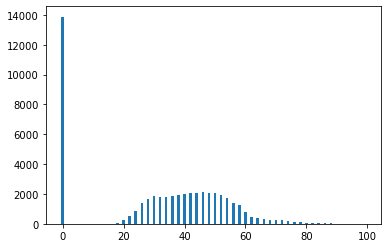

In [21]:

null_agehh = cust_df.loc[cust_df['AgeHH1'].isnull()]
print("Number of rows with null values in AgeHH1:",null_agehh.shape[0],"\n")

# Here we test whether the rows with null agehh1 values coincides with other rows
df_isnull_cols(null_agehh)

# Here we check the range of values this column has.
print('AgeHH1.describe()')
print(cust_df.AgeHH1.describe())
print('\nAgeHH1 value counts')
plt.bar(cust_df['AgeHH1'].value_counts().index, cust_df['AgeHH1'].value_counts().values);


### AgeHH1 and AgeHH2 Analysis

Here we can see that the 905 rows coincides with **AgeHH2** and also that the other rows are mostly filled with valuable information. With that in mind, we should treat the values rather than remove the rows. 

Since the column has a high number of 0, we could just set the values to 0 without significantly skewing the results. If the column refers to age of subscribers, it could be because they refuse to provide an age or other reasons.

In this case, we will replace the values of both columns with 0 and proceed with the analysis.

In [22]:
# Here we use replace the values with 0
cust_df.AgeHH1.replace(np.nan,0,inplace=True)
cust_df.AgeHH2.replace(np.nan,0,inplace=True)

# Then we shall look at the null values table again.
df_isnull_cols(cust_df)

            Total Null Values in Columns

              COLUMN NAME        SUM
              ServiceArea         24




### Lastly we look at Service Area
Service Area is a special column with varied values, let us delve deeper.

In [23]:
cust_df.ServiceArea.describe()

print("Number of unique values of column ServiceArea: ",cust_df.ServiceArea.nunique())
#plt.bar(cust_df['ServiceArea'].value_counts().index, cust_df['ServiceArea'].value_counts().values);

count         50857
unique          747
top       NYCBRO917
freq           1682
Name: ServiceArea, dtype: object

Number of unique values of column ServiceArea:  747


### Service Area analysis
Service area has 24 rows with empty values. There are a few methods to impute, such as filling it in with the mode value. In this case, we shall be doing that because the top value has a high frequency, coupled with the high number of unique values, also with high variance in the frequency, adding more to it should not affect the prediction alot.

In [24]:
# Here we replace the null values with the mode of the column.
cust_df.ServiceArea.replace(np.nan,cust_df["ServiceArea"].mode()[0],inplace=True)

# Then we shall look at the null values table again.
df_isnull_cols(cust_df)

No Null Values Found




### <mark>__Result for Q1.2__:      
<font color='teal'>*Type your answer here for how would you impute the missing values (if any)*</font>

There are a few methods to impute the missing values. 

**The Easiest Method**  
This would be to drop the rows or columns with missing values immediately. This is not recommended as we would lose accuracy for the model. We can do this through methods such as pandas.DataFrame.dropna.

**The slightly better solution**  
This would be to impute any missing values with either the mean or the modal value within the column. This is a fast and easy method that would probably hold a much better form of accuracy.

**What we did**  
We went further and investigated all the columns with missing values and applied a reasonable strategy per column. This should provide us with a better dataset from which we can build our model on later on.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

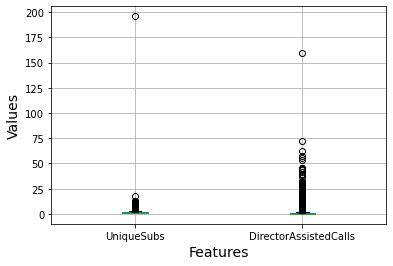

In [25]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)
plt.xlabel('Features', size=14);
plt.ylabel('Values', size=14);


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
61,3000406,No,114.13,1650.0,83.0,1.73,52.0,0.0,-177.0,17.9,3.7,5.3,23.0,0.0,0.0,362.5,90.0,34.0,412.0,56.7,9.3,0.0,21.3,50,6,4,SANSAN210,4.0,4.0,306.0,40.0,34.0,No,Yes,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,4,No,0,130,No,1-Highest,Other,Clerical,No
83,3000570,No,260.81,3210.0,213.0,44.30,0.0,0.0,-422.0,-21.2,9.7,20.7,142.0,4.7,0.3,824.9,141.7,28.0,906.3,210.3,30.3,0.0,34.7,53,2,1,SANAUS512,11.0,6.0,124.0,40.0,0.0,No,No,Yes,Yes,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,5,No,3,150,No,3-Good,Other,Other,Unknown
87,3000598,No,122.00,1806.0,75.0,15.59,146.0,1.0,-156.0,-32.8,5.0,14.0,62.7,2.0,0.7,409.9,50.0,13.0,290.3,147.7,19.0,0.0,14.7,49,2,1,SANSAN210,7.0,7.0,69.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,30,No,6-VeryLow,Suburban,Other,Unknown
104,3000730,Yes,117.12,490.0,70.0,0.00,140.0,0.0,506.0,133.8,11.3,4.0,46.7,1.0,1.3,103.5,26.7,13.3,142.3,31.3,15.3,0.0,2.0,51,6,2,SLCPRO801,3.0,3.0,279.0,30.0,0.0,No,No,Yes,Yes,Yes,Known,No,No,No,No,No,No,1,1,Yes,No,0,2,No,0,30,Yes,6-VeryLow,Suburban,Other,Unknown
107,3000762,Yes,180.22,3559.0,150.0,11.38,99.0,0.0,-149.0,-11.4,3.7,31.0,120.7,0.0,0.3,1543.7,26.7,6.7,725.3,468.7,34.7,0.0,60.7,55,3,2,OKCLRK501,10.0,5.0,-3.0,0.0,0.0,No,Yes,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,150,No,3-Good,Other,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50754,3397714,No,121.05,1225.0,110.0,13.53,0.0,6.9,419.0,3.8,16.7,1.0,46.0,0.7,0.3,388.1,56.3,5.7,214.3,173.3,17.7,0.0,4.7,29,1,1,LAXSMN310,3.0,3.0,276.0,0.0,0.0,No,Yes,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,200,No,7-Lowest,Other,Other,Unknown
50803,3398054,No,315.63,1920.0,100.0,13.86,785.0,0.3,-133.0,-35.9,4.7,8.0,109.7,0.0,0.3,334.9,39.7,6.0,215.0,138.0,12.7,0.0,0.3,28,1,1,LAXCDG310,4.0,4.0,19.0,34.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,9,No,0,30,No,1-Highest,Other,Other,No
50817,3398162,No,232.66,3360.0,160.0,10.39,506.0,0.0,1578.0,199.8,33.7,8.0,220.7,6.0,1.3,651.5,351.0,37.7,414.7,516.7,46.7,0.0,0.0,33,2,2,LAXSMN310,8.0,7.0,47.0,24.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,200,No,5-Low,Suburban,Clerical,No
50862,3398526,Yes,108.20,486.0,30.0,11.88,190.0,0.0,410.0,78.2,3.3,0.3,17.3,0.0,0.0,77.8,41.7,22.3,74.0,38.3,3.7,0.0,0.7,29,2,2,NEVENC760,1.0,1.0,882.0,50.0,34.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,5,No,0,Unknown,No,5-Low,Other,Professional,No


Shape before dropping: (50881, 58)
Shape after dropping: (50163, 58)
718 rows dropped



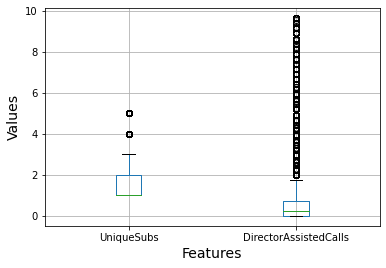

In [26]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

top_percent_df=cust_df[(cust_df["UniqueSubs"]   > cust_df["UniqueSubs"].quantile(q=0.99)) | 
              (cust_df["DirectorAssistedCalls"] > cust_df["DirectorAssistedCalls"].quantile(q=0.99))]

display(top_percent_df)

#reuse previously created columns to drop rows
drop_df_rows(cust_df,top_percent_df)

#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)
plt.xlabel('Features', size=14);
plt.ylabel('Values', size=14);


## Q2. Perform exploratory analysis to analyze customer churn

### Initial data handling

Here we want to create the lists of features that are either numerical or categorical. This will allow us to do better handling of data further on.

In [27]:
#cust_df.churn=cust_df.replace({'Yes':1,'No':0})

In [28]:
# List of categoricals
categoricals = list()
numericals = list()
for x in cust_df.columns:
    if cust_df[x].dtype == 'object':
        categoricals.append(x)        
    else:
        numericals.append(x)


### Q2.1 Does customers with high overage minutes also have high revenue?

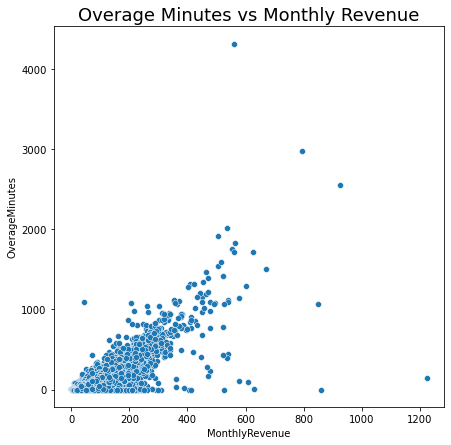

In [29]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
plt.figure(figsize=(7,7));
plt.title('Overage Minutes vs Monthly Revenue', size=18);

sns.scatterplot(x    = cust_df.MonthlyRevenue, 
                y    = cust_df.OverageMinutes, 
                data = cust_df
               );

In [30]:
print("Correlation coefficient of the two features: %.3f" % (cust_df["MonthlyRevenue"].corr(cust_df["OverageMinutes"])) )

Correlation coefficient of the two features: 0.784


### <mark>__Result:__
    
Our plot shows customers with high overage minutes produces high revenue. This observation is corroborated with the high corrrelation coefficient of 0.784.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

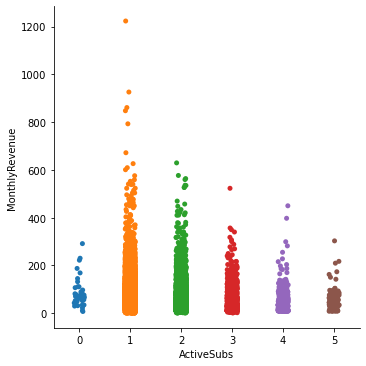

In [31]:
#use category plot to plot monthly revenue for each active subs category

sns.catplot(data=cust_df, 
            x=cust_df.ActiveSubs, 
            y=cust_df.MonthlyRevenue); 

In [32]:
print("Correlation coefficient of ActiveSubs and MonthlyRevenue: %.3f" % (cust_df["MonthlyRevenue"].corr(cust_df["ActiveSubs"].loc[cust_df["ActiveSubs"]>0])) )

Correlation coefficient of ActiveSubs and MonthlyRevenue: -0.048


### <mark>__Result for Q2.2:__
   
From the above category plot, we should be able to conclude that in most cases, having a higher number of activesubs do lead to lower monthly revenue. However, we can see that the users with 0 active subscriptions do not create high revenue, causing the plot to suggest otherwise. This is also shown with the correlation coefficient being close to 0. 



### Q2.3 Does credit rating have an impact in churn rate?

In [33]:
# Breakdown of Credit Rating vs Churn
pd.crosstab(cust_df.CreditRating, cust_df.Churn)

Churn,No,Yes
CreditRating,,
1-Highest,5740,2550
2-High,13173,5662
3-Good,5696,2563
4-Medium,3895,1370
5-Low,4948,1387
6-VeryLow,802,296
7-Lowest,1480,601


In [34]:
# Breakdown of Credit Rating vs Churn in %
cross_crc = pd.crosstab(cust_df.CreditRating, cust_df.Churn).apply(lambda r: r/r.sum(), axis=1)*100
cross_crc

Churn,No,Yes
CreditRating,,
1-Highest,69.240048,30.759952
2-High,69.938943,30.061057
3-Good,68.967187,31.032813
4-Medium,73.979107,26.020893
5-Low,78.105762,21.894238
6-VeryLow,73.041894,26.958106
7-Lowest,71.119654,28.880346


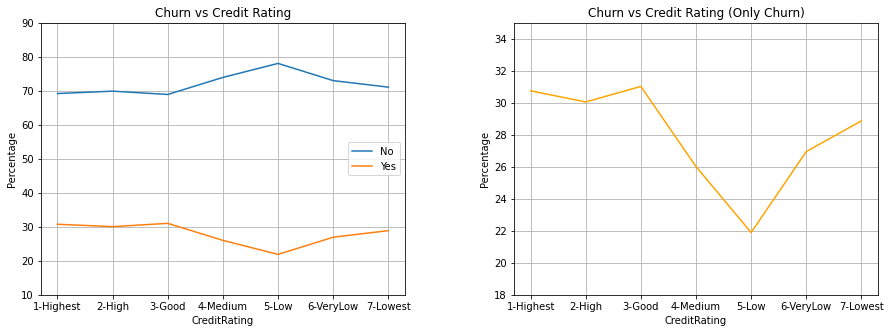

In [35]:
# Visualising breakdown of Credit Rating vs Churn in %
# Blue line is 'Retained'
# Orange line is 'Churned'

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 5))
plt.subplots_adjust(wspace = 0.3)


ax1.plot(cross_crc)
ax1.legend(cross_crc,loc = 'center right')
ax1.grid(True)
ax1.set_ylim(10,90)  
ax1.set_title('Churn vs Credit Rating')
ax1.set_xlabel('CreditRating')
ax1.set_ylabel('Percentage');

ax2.plot(cross_crc['Yes'],color='orange')
#ax2.legend('Yes',loc = 'center left')
ax2.set_title('Churn vs Credit Rating (Only Churn)')
ax2.grid(True)
ax2.set_ylim(18,35)  
ax2.set_xlabel('CreditRating')
ax2.set_ylabel('Percentage');

### <mark>__Result for Qn2.3:__
    
Our plot shows that the credit rating of customers does not seem to have an impact in the churn rate.

### Placeholder for additional exploratory analysis

In [36]:
#type your code here for any additional exploratory analysis (if any)
# As we are required to add some features, 
# we will do some of the EDA such as coefficient comparison after the next section.


## Q3. Create additional features to help predict churn

In [37]:
# Utility functions for this section

# This wrapper function is to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_mins']=cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    return cust_df  

def prep_categorical_features(df):
    """
    helper function to segregate binary features from categorical features. 
    """
    categories = list()
    binary = list()
    for c in df:
        if df[c].nunique() > 2:
            categories.append(c)
        else:
            binary.append(c)
    return categories, binary


In [38]:
# Call the wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df.shape

(50163, 61)

In [39]:
# Since addtional features were added, we should check for null values again.
df_isnull_cols(cust_df)

            Total Null Values in Columns

              COLUMN NAME        SUM
        perc_overage_mins        714




In [40]:
# Since there were some values that were divided by zero, resulting in nan
# We will replace those values with zero

cust_df.perc_overage_mins.replace(np.nan,0,inplace=True)

# check for null values again.
df_isnull_cols(cust_df)

No Null Values Found




### Encoding the dataframe

Since the dataframe has some features that are categorical, we will need to encode those before we proceed to build our model. Here we are deciding between One-Hot encoding and Label encoding. One-hot encoding is preferred when the categorical features are not ordinal. Let us investigate.

In [41]:
cust_df[categoricals].nunique().sort_values(ascending=False)

ServiceArea                745
HandsetPrice                16
Occupation                   8
CreditRating                 7
PrizmCode                    4
MaritalStatus                3
OwnsComputer                 2
MadeCallToRetentionTeam      2
OwnsMotorcycle               2
NotNewCellphoneUser          2
NewCellphoneUser             2
HasCreditCard                2
Churn                        2
OptOutMailings               2
RespondsToMailOffers         2
BuysViaMailOrder             2
Homeownership                2
RVOwner                      2
TruckOwner                   2
HandsetWebCapable            2
HandsetRefurbished           2
ChildrenInHH                 2
NonUSTravel                  2
dtype: int64

In [42]:
# Those features with exactly two categorical values are binary and fit well with one-hot encoding.
# We would check whether the non-binary features are ordinal and if encoding these non-binary features is suitable.

cust_df['ServiceArea'].value_counts()
cust_df['HandsetPrice'].value_counts()
cust_df['CreditRating'].value_counts()
cust_df['PrizmCode'].value_counts()
cust_df['MaritalStatus'].value_counts()


NYCBRO917    1691
HOUHOU281    1481
DALDAL214    1470
NYCMAN917    1165
APCFCH703     777
             ... 
KCYLEA913       1
PHIMIL302       1
OHIBCY419       1
MILWAT920       1
INDCRA765       1
Name: ServiceArea, Length: 745, dtype: int64

Unknown    28668
30          7170
150         4034
130         2053
10          1881
80          1878
60          1731
200         1216
100         1201
40           239
400           42
250           20
300           10
500            8
180            8
240            4
Name: HandsetPrice, dtype: int64

2-High       18835
1-Highest     8290
3-Good        8259
5-Low         6335
4-Medium      5265
7-Lowest      2081
6-VeryLow     1098
Name: CreditRating, dtype: int64

Other       24220
Suburban    16067
Town         7484
Rural        2392
Name: PrizmCode, dtype: int64

Unknown    19297
Yes        18361
No         12505
Name: MaritalStatus, dtype: int64

### Ordinality Analysis
We investigated 5 categorical features that had more than 2 unique values. 

**Handset Price**  
Even though handset price should be a numerical feature, there are a large number of unknown values and could not be handled. We cannot set the null values to 0 also because it might skew the result. 

**Service Area (Not Ordinal)**    
Service area has a very large amount of unique values but it still could have impact on our analysis. We will apply label encoding to it and further investigate.

**Credit Rating (Ordinal)**    
Credit rating is a ordinal feature. Since it already has a number in front of the values, we can remove the back portion to change it to a numerical feature. ie. 1= Highest, 2=High, etc.

**Marital Status and Prizm Code(Not Ordinal)**  
These features are just categorical in nature and we will apply enconding to them.


In [43]:
# Changing the creditrating column into a numerical feature
# Take the first digit in the string and convert it to an integer.
cust_df['CreditRating']=cust_df['CreditRating'].astype(str).str[0].astype(int)
cust_df['CreditRating'].describe()

numericals.append('CreditRating')
categoricals.remove('CreditRating')

count    50163.000000
mean         2.883141
std          1.579171
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          7.000000
Name: CreditRating, dtype: float64

In [44]:
# Segregate binary features from categorical features for better quality encoding
categoricals, binaries = prep_categorical_features(cust_df[categoricals])

display(categoricals)
display(binaries)
display(numericals)

['ServiceArea', 'HandsetPrice', 'PrizmCode', 'Occupation', 'MaritalStatus']

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

['CustomerID',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'CreditRating']

In [45]:
# A quick visual to confirm that the features are binaries 
for c in cust_df[binaries]:
    compare_value_counts(cust_df[c])

Comparing Churn 

     Counts  Percentage
No    35734   71.235771
Yes   14429   28.764229


Comparing ChildrenInHH 

     Counts  Percentage
No    37999   75.751052
Yes   12164   24.248948


Comparing HandsetRefurbished 

     Counts  Percentage
No    43240   86.198991
Yes    6923   13.801009


Comparing HandsetWebCapable 

     Counts  Percentage
Yes   45251   90.207922
No     4912    9.792078


Comparing TruckOwner 

     Counts  Percentage
No    40774   81.283017
Yes    9389   18.716983


Comparing RVOwner 

     Counts  Percentage
No    46077   91.854554
Yes    4086    8.145446


Comparing Homeownership 

         Counts  Percentage
Known     33453   66.688595
Unknown   16710   33.311405


Comparing BuysViaMailOrder 

     Counts  Percentage
No    31971   63.734226
Yes   18192   36.265774


Comparing RespondsToMailOffers 

     Counts  Percentage
No    31212   62.221159
Yes   18951   37.778841


Comparing OptOutMailings 

     Counts  Percentage
No    49418   98.514842
Yes     745 

In [46]:
###############################################
## creating instance of one-hot encoding
# enc = OneHotEncoder(handle_unknown='ignore')

## passing column (label encoded values)
# enc_df = pd.DataFrame(enc.fit_transform(cust_df[categoricals]).toarray())

# display(enc_df)

In [47]:
# Encode binary features with labelBinarizer function
lb = LabelBinarizer()

for x in binaries:
    cust_df[x] = lb.fit_transform(cust_df[x])

display(cust_df.shape)

(50163, 61)

In [48]:
# Encode non-binary features with LabelEncoder function
le = LabelEncoder()

for x in categoricals:
    cust_df[x] = le.fit_transform(cust_df[x])
    
display(cust_df.shape)

(50163, 61)

In [49]:
#Check if all non-binary and binary categorical features have been encoded
cust_df.dtypes.value_counts()
display(cust_df)

float64    29
int32      23
int64       9
dtype: int64

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,658,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,8,1,1,2,4,0,0.5,0.916667,0.000000
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,610,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,8,0,4,2,4,2,1.0,1.000589,0.000000
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,352,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6,0,0,15,0,3,3,1,2,1.0,1.000000,0.000000
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,610,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,0,0,4,0,3,0,1.0,0.911522,0.000000
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,0,0,1,0,4,2,1.0,0.991832,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,404,1.0,1.0,883.0,58.0,0.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,3,0,0,15,0,3,0,3,2,1.0,0.532581,0.682540
51039,3399922,0,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,1,411,1.0,1.0,882.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,6,2,3,1,1.0,1.000000,0.000000
51040,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,317,1.0,1.0,882.0,50.0,60.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,7,0,0,15,0,1,0,4,1,1.0,0.972357,0.005525
51041,3399946,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,292,2.0,2.0,489.0,22.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,8,0,5,0,4,2,1.0,0.255341,0.651042


### Investigating Collinearity
In some cases, highly-correlated variables damage the veracity of models.<br>
We should remove these variables, when necessary, to improve our churn prediction.

In [50]:
# Drop customerID column as it is irrelevant to our prediction model
cust_df=cust_df.drop(['CustomerID'],axis=1)

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

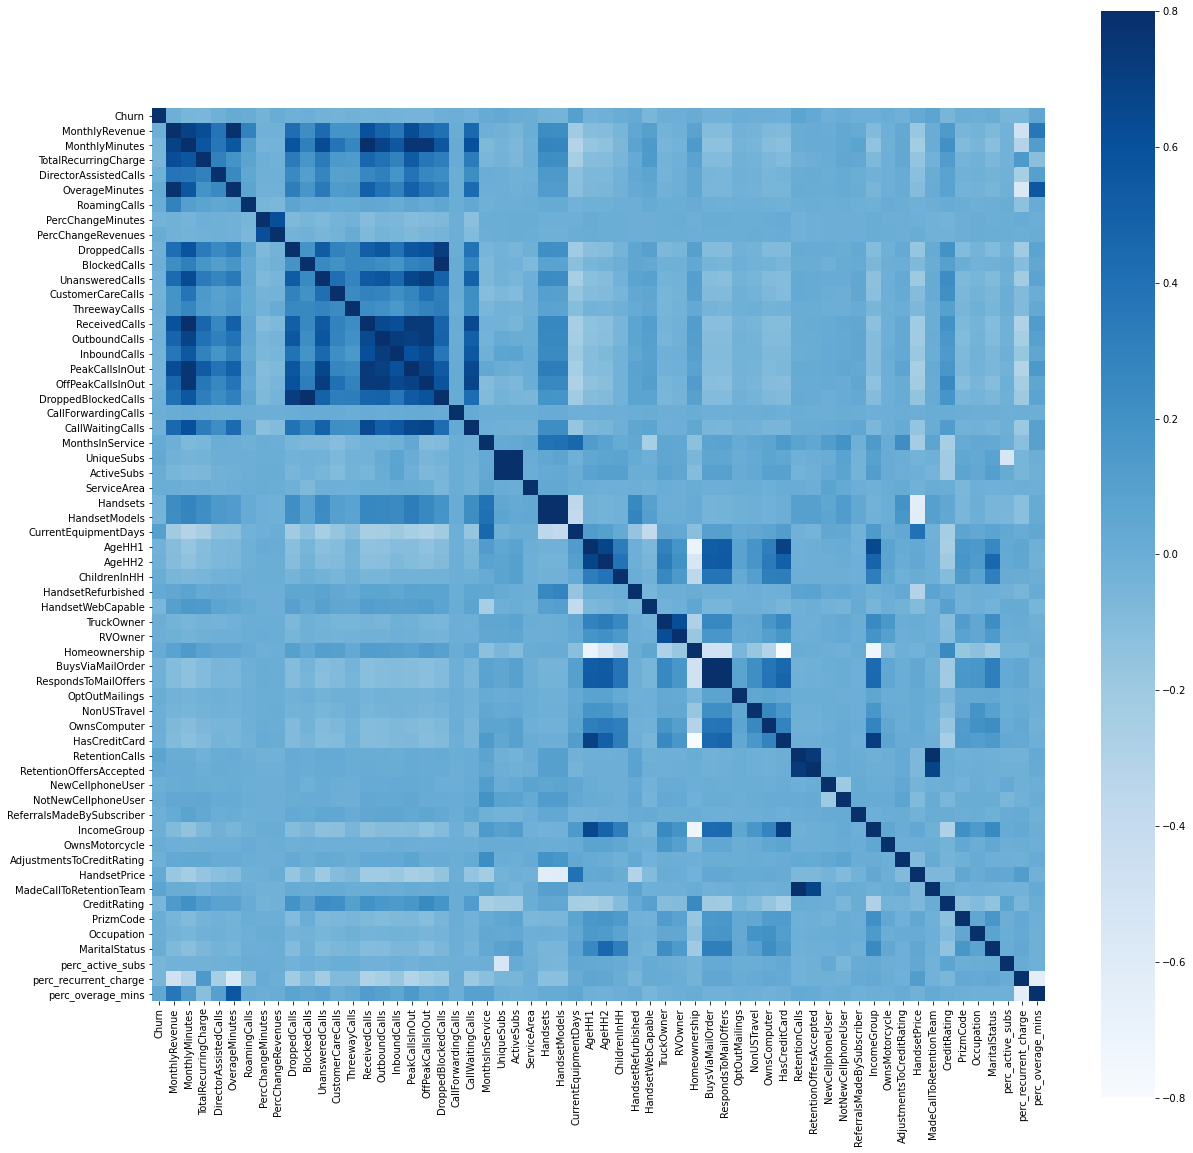

In [51]:
# Use the corr() function to see correlation between each feature (column)
correlation=cust_df.corr()
plt.figure(figsize=(20,20));
sns.heatmap(correlation, square= True, vmax=0.8,cmap='Blues')
#correlation["Churn"].sort_values(ascending=False)

In [52]:
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(cust_df, height = 2, diag_kind="kde", kind="reg")
# plt.show()

###  Reducing multicollinearity 

Between two highly-correlated variables, we removed the variable that has lower correlation with **Churn** feature and kept the other. This reduces the number of features to consider into our churn prediction.


In [53]:
# Here we are defining the parameters we are going to use.
# This can be easily changed into a function should we need to use it again.
correlation=cust_df.corr()
correlated_features = set()
target_feature = 'Churn'
target_corr_value = 0.8

for i in range(len(correlation .columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > target_corr_value:
            feature1 = correlation.columns[i]
            feature2 = correlation.columns[j]
            print (f"{correlation.columns[i]} and {correlation.columns[j]} are correlated at a factor of {correlation.iloc[i, j]:.3f}\n" )
                   
                   
            if feature1 != 'Churn' and feature2 != 'Churn':
                if abs(correlation[target_feature][feature1]) > abs(correlation[target_feature][feature2]):
                    correlated_features.add(feature2)
                else:
                    correlated_features.add(feature1)

print(f"\nHighly-correlated features to be removed: {correlated_features}")

ReceivedCalls and MonthlyMinutes are correlated at a factor of 0.824

DroppedBlockedCalls and BlockedCalls are correlated at a factor of 0.815

ActiveSubs and UniqueSubs are correlated at a factor of 0.808

HandsetModels and Handsets are correlated at a factor of 0.887

RespondsToMailOffers and BuysViaMailOrder are correlated at a factor of 0.968

HasCreditCard and Homeownership are correlated at a factor of -0.801

MadeCallToRetentionTeam and RetentionCalls are correlated at a factor of 0.958


Highly-correlated features to be removed: {'BlockedCalls', 'HasCreditCard', 'BuysViaMailOrder', 'ReceivedCalls', 'RetentionCalls', 'Handsets', 'ActiveSubs'}


In [54]:
# Between two highly-correlated variables, we removed the variable that has lower correlation with Churn feature  
cust_df.drop(correlated_features, axis=1, inplace=True)

In [55]:
# Create a new dataframe for the prediction model
clean_df= cust_df

## Q4. Build classification model to predict customer churn month in advance

In [56]:
# Helper functions for the following section

def display_lr_scores(test,pred,prob=[]):
    """
    helper function to display Logistic Regression Scores
    """    
    lr_df=[]
    lr_df.append(['Accuracy Score',metrics.accuracy_score(test, pred)])
#    lr_df.append(['R-Square',metrics.r2_score(test, pred)])
    lr_df.append(['Precision Score',metrics.precision_score(test, pred)])
    lr_df.append(['Recall Score',metrics.recall_score(test, pred)])
    lr_df.append(['F1 Score',metrics.f1_score(test, pred)])
    lr_df.append(['Mean Absolute Error',metrics.mean_absolute_error(test, pred)])
    lr_df.append(['Mean Squared Error',metrics.mean_squared_error(test, pred)])
    lr_df.append(['Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(test, pred))])
    if prob != []:
        lr_df.append(['AUC Score',metrics.roc_auc_score(test, prob[:,1])])
        lr_df.append(['GINI Score',gini_coefficient(prob)])
    
    lr_df=pd.DataFrame(lr_df,columns=['Test','Score'])#.set_index(['Test','Score'])
#    display(lr_df)
    
    split_lr_df=[]
    prfs=metrics.precision_recall_fscore_support(test, pred)
    split_lr_df.append(['Cases',f'{prfs[3][0]:.0f}',f'{prfs[3][1]:.0f}'])
    split_lr_df.append(['Precision',f'{prfs[0][0]:.5f}',f'{prfs[0][1]:.5f}'])
    split_lr_df.append(['Recall',f'{prfs[1][0]:.5f}',f'{prfs[1][1]:.5f}'])
    split_lr_df.append(['F1',f'{prfs[2][0]:.5f}',f'{prfs[2][1]:.5f}'])
    split_lr_df=pd.DataFrame(split_lr_df,columns=['Test','Negative','Positive'])#.set_index(['Test','Postive','Negative'])
#    display(split_lr_df)

    l1=lr_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption('Model Scores')._repr_html_()
    l2=split_lr_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption('Split positive negative')._repr_html_()

    display(HTML(l1+(10*"\xa0")+l2))

def get_score_display(test,pred,prob=[]):
    """
    helper function to display Logistic Regression Scores
    """    
    score_df=[]
    score_df.append(['Accuracy Score',metrics.accuracy_score(test, pred)])
#    lr_df.append(['R-Square',metrics.r2_score(test, pred)])
    score_df.append(['Precision Score',metrics.precision_score(test, pred)])
    score_df.append(['Recall Score',metrics.recall_score(test, pred)])
    score_df.append(['F1 Score',metrics.f1_score(test, pred)])
    score_df.append(['Mean Absolute Error',metrics.mean_absolute_error(test, pred)])
    score_df.append(['Mean Squared Error',metrics.mean_squared_error(test, pred)])
    score_df.append(['Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(test, pred))])
    if prob != []:
        score_df.append(['AUC Score',metrics.roc_auc_score(test, prob[:,1])])
        score_df.append(['GINI Score',gini_coefficient(prob)])
    score_df=pd.DataFrame(score_df,columns=['Test','Score'])#.set_index(['Test','Score'])

    split_df=[]
    prfs=metrics.precision_recall_fscore_support(test, pred)
    split_df.append(['Cases',f'{prfs[3][0]:.0f}',f'{prfs[3][1]:.0f}'])
    split_df.append(['Precision',f'{prfs[0][0]:.5f}',f'{prfs[0][1]:.5f}'])
    split_df.append(['Recall',f'{prfs[1][0]:.5f}',f'{prfs[1][1]:.5f}'])
    split_df.append(['F1',f'{prfs[2][0]:.5f}',f'{prfs[2][1]:.5f}'])
    split_df=pd.DataFrame(split_df,columns=['Test','Negative','Positive'])#.set_index(['Test','Postive','Negative'])

    return(score_df,split_df)

def display_side_by_side(score_df,split_df):
    """
    Function to display 2 dataframes side by side, here hardcoded captions as we only use for model scores comparison
    """    
    left_caption='Model Scores'
    right_caption= 'Split positive negative'
    l1=score_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption(left_caption)._repr_html_()
    l2=split_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption(right_caption)._repr_html_()

    display(HTML(l1+(10*"\xa0")+l2))

def display_model_comparisons(train_score_df,train_split_df,test_score_df,test_split_df):
    """
    Function to display compare scores of train and test data.
    """       
    
    l1=train_score_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption('Train Scores')._repr_html_()
    l2=test_score_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption('Test Scores')._repr_html_()

    l3=train_split_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption('Train Scores')._repr_html_()
    l4=test_split_df.style.hide_index().set_table_attributes("style='display:inline'").set_caption('Test Scores')._repr_html_()
        
    display(HTML(l1+(10*"\xa0")+l2))
    print(f' Comparing scores after splitting postive and negative')
    display(HTML(l3+(20*"\xa0")+l4))    


In [57]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

In [58]:
def gini_coefficient(x):
    """
    Helper function to compute Gini coefficient of array of values
    """
    diffsum = 0

    for i, j in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(j - x[i:]))
    return diffsum / (len(x) ** 2 * np.mean(x))

def plot_auc(labels, probs):
    # Compute the false positive rate, true positive rate and threshold along with the AUC
    fpr, tpr, threshold = metrics.roc_curve(labels, probs[:,1])
    auc = metrics.auc(fpr, tpr)
    
    # Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.3f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def display_lr_confusion_matrix(test,pred):
    """
    helper function to display confusion matrix
    """    
    cm=confusion_matrix(test, pred)
    
    cm_lr_df=[]
    cm_lr_df.append(['Actual Retain',cm[0, 0],cm[0, 1]])
    cm_lr_df.append(['Actual Churn',cm[1, 0],cm[1, 1]])    
    
    cm_lr_df=pd.DataFrame(cm_lr_df,columns=[' ','Predicted Retain','Predicted Churn']).set_index([' ','Predicted Retain','Predicted Churn'])
    display(cm_lr_df)
    
def print_confusion_matrix(test,pred,title='Confusion Matrix'):
    cm = confusion_matrix(test,pred)
    sns.heatmap(cm,annot = True,fmt = "g",cmap = 'Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=[0.5,1.5], labels=['Retain','Churn'], ha='center')  # ha = horizontal alignment, va = vertical alignment
    plt.yticks(ticks=[0.5,1.5], labels=['Retain','Churn'], va='center'); # Use ; to disable output text

In [59]:
def lr_gridsearch(X_train, y_train):
    """
    Function to run logistic regression gridsearch
    """
    grid_values = {'C':[0.001,0.01,1,10] , 
                   'penalty':['l1', 'l2'],
                   'class_weight':[{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}]}
    grid_lr = GridSearchCV(LogisticRegression(random_state=33), 
                           param_grid = grid_values,
                           scoring = 'roc_auc',
                           n_jobs=-1)
    grid_lr = grid_lr.fit(X_train, y_train)
    return grid_lr

def rfc_gridsearch(X_train, y_train):
    """
    Function to run Random Forest Classification gridsearch
    """
    # Running hyperparameter testing to determine the best parameters to build model with.
    parameters = {
                  "n_estimators":[5, 10, 50, 100, 150, 200, 250, 300],
                  "max_depth":[int(x) for x in np.linspace(start=2, stop=15, num=2)],
                  "min_samples_split":[int(x) for x in np.linspace(start=100, stop=150, num=1)],
                  "min_samples_leaf":[int(x) for x in np.linspace(start=60, stop=150, num=1)],
                  "class_weight":[{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}]

    }
    
    grid_rfc = GridSearchCV(RandomForestClassifier(random_state=33), 
                            param_grid = parameters,
                            cv=5,
                            n_jobs=-1)
    
    grid_rfc = grid_rfc.fit(X_train, y_train)
    return grid_rfc


### Initial data processing for model building exercise

In [60]:
# Check if all features have been converted to numerical values
cust_df.dtypes.value_counts()
cust_df.shape

float64    26
int32      21
int64       6
dtype: int64

(50163, 53)

In [61]:
## Building the model

# Define columns to be included in X and y
# X = Independent variables
# Y = Dependent (target) variable, that is Churn.
X = cust_df.drop(columns=['Churn'])
y = cust_df['Churn']

# Train-test-split: Test with 30% of available data 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
#                                                    stratify=y,
                                                    random_state=33)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler().fit(X)
X_train = pd.DataFrame(scalerx.transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scalerx.transform(X_test),columns=X.columns)

print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape:  ', X_test.shape)
print('Y test shape:  ', y_test.shape)

X train shape:  (35114, 52)
Y train shape:  (35114,)
X test shape:   (15049, 52)
Y test shape:   (15049,)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


### Hyperparameter tuning of Logistic Regression model
 
We employed a grid search cross-validation function to estimate the best parameters for our model

In [62]:
#-------------------------------- Model training -------------------------------#
#type your code to build logistic regression model on training data set

# Run GridSearchCV to loop through predefined hyperparameters and 
# fit our estimator (model) on train/test set.
 #grid_values = {'C':[0.001,0.01,1,10] , 
 #               'penalty':['l1', 'l2'],
 #               'class_weight':[{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}]}
 #grid_lr = GridSearchCV(LogisticRegression(random_state=33), 
 #                       param_grid = grid_values,
 #                       scoring = 'roc_auc',
 #                       n_jobs=-1)
 #grid_lr = grid_lr.fit(X_train, y_train)
 #print(grid_lr.best_params_)

# Change this parameter to decide whether to run LR gridsearch
run_lr_gridsearch=False

# Run gridsearch depending on the boolean, this is to save runtime between runs of whole noteboooks. 
# Users should update the hardcoded values below after every change for optimisation of future runs.
if run_lr_gridsearch:
    # Use gridsearch function written to get the optimised parameters
    grid_lr=lr_gridsearch(X_train, y_train)
    lr_best_params=grid_lr.best_params_
else:
    # Hard coded best parameters from the previous run of gridsearch 
    lr_best_params={'C': 0.01, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2'}

print(lr_best_params)

{'C': 0.01, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2'}


###  Training of Logistic Regression model   
We used the tuned hyperparameters to build our model and evaluated its performance to the train/test dataset.

In [63]:
# Build the Logistic Regression (LR) model 
lr= LogisticRegression(C = lr_best_params['C'],
                       penalty = lr_best_params['penalty'],
                       class_weight = lr_best_params['class_weight'],
#                       solver = "saga",
                       random_state=33)
lr.fit(X_train, y_train)

# Fit LR model to the train set
y_train_pred = lr.predict(X_train)
print('Logistic Regression scores for Train Data')
display_lr_scores(y_train,y_train_pred)

# Fit LR model to the test set
y_pred = lr.predict(X_test)
print('\nLogistic Regression scores for Test Data')
display_lr_scores(y_test,y_pred)



LogisticRegression(C=0.01, class_weight={0: 0.3, 1: 0.7}, random_state=33)

Logistic Regression scores for Train Data



Logistic Regression scores for Test Data


#### <mark> **Interpretation:** 
    
The performance scores of our Logistic Regression model for the train data are close to those of the test data. 

In [64]:
# Get the coefficient and intercept of the model

# Show the intercept value of the LR model
print('Intercept value:',lr.intercept_[0])

# Show the coefficients of each feature
# This will show us the most important features for the model
print('\nCoefficient values of features.')

coef_df = pd.Series(lr.coef_[0], X.columns)
display(coef_df.sort_values(ascending=False))

Intercept value: -0.1039195526116063

Coefficient values of features.


CurrentEquipmentDays         0.319976
MadeCallToRetentionTeam      0.144274
PercChangeRevenues           0.099798
HandsetRefurbished           0.092857
OverageMinutes               0.065926
ChildrenInHH                 0.056399
HandsetModels                0.054932
DroppedBlockedCalls          0.042338
OutboundCalls                0.034381
MonthlyRevenue               0.027621
DroppedCalls                 0.026147
OwnsMotorcycle               0.025394
UnansweredCalls              0.024106
MaritalStatus                0.019252
OwnsComputer                 0.016973
UniqueSubs                   0.016477
RoamingCalls                 0.016192
perc_overage_mins            0.013244
ServiceArea                  0.013126
CallWaitingCalls             0.009928
OptOutMailings               0.008531
NonUSTravel                  0.004861
NotNewCellphoneUser          0.004606
CallForwardingCalls          0.002700
PrizmCode                    0.001107
TruckOwner                  -0.001558
RVOwner     

In [65]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

In [66]:
# By default, LogisticRegression.predict_proba() assigns a threshold of 0.5
# Therefore, we would just use the function by default
# This function gives us the probabilities for the target 
# (0 and 1 in this case) in array form

X_train_prob=lr.predict_proba(X_train)
X_test_prob=lr.predict_proba(X_test)

#display probabilities in a table
pd.DataFrame(X_test_prob, columns = ["Retained", "Probability of Churn"])  
#pd.DataFrame(X_train_prob, columns = ["Retained", "Probability of Churn"])  

# If we want to change the threshold to something other than 0.5, 
# We can use the function score_model(), can be seen in the top of this section
# X_train_prob=score_model(X_train_prob,0.5)
# X_test_prob=score_model(X_test_prob,0.5)

,Retained,Probability of Churn
0,0.551849,0.448151
1,0.732324,0.267676
2,0.768192,0.231808
3,0.548202,0.451798
4,0.530784,0.469216
...,...,...
15044,0.559131,0.440869
15045,0.522565,0.477435
15046,0.605682,0.394318
15047,0.582307,0.417693


In [67]:
#Evaluate model accuracy using fitted y value and actual y_test

### Evaluating performance of Logistic Regression model
We used several performance metrics to evaluate our model against train/test dataset, as follows:
GINI, AUC, Precision, Recall, and Confusion matrix  

In [68]:
#Evaluation metrics to be used - GINI, AUC, Precision, Recall, and confusion matrix
# Printing logistic regression model scores comparison between training data and test data

print('Logistic Regression scores comparison')
lr_test_score_df,lr_test_split_df=get_score_display(y_test,y_pred,X_test_prob)
lr_train_score_df,lr_train_split_df=get_score_display(y_train,y_train_pred,X_train_prob)

display_model_comparisons(lr_train_score_df,lr_train_split_df,lr_test_score_df,lr_test_split_df)

Logistic Regression scores comparison


Test,Score
Accuracy Score,0.619952
Precision Score,0.375282
Recall Score,0.497457
F1 Score,0.427818
Mean Absolute Error,0.380048
Mean Squared Error,0.380048
Root Mean Squared Error,0.616480
AUC Score,0.620662
GINI Score,0.219103
Test,Score


 Comparing scores after splitting postive and negative


Test,Negative,Positive
Cases,25085,10029
Precision,0.76902,0.37528
Recall,0.66893,0.49746
F1,0.71549,0.42782
Test,Negative,Positive
Cases,10649,4400
Precision,0.75902,0.37522
Recall,0.66194,0.49136
F1,0.70716,0.42551


          Classification Report for test data
              precision    recall  f1-score   support

           0       0.76      0.66      0.71     10649
           1       0.38      0.49      0.43      4400

    accuracy                           0.61     15049
   macro avg       0.57      0.58      0.57     15049
weighted avg       0.65      0.61      0.62     15049



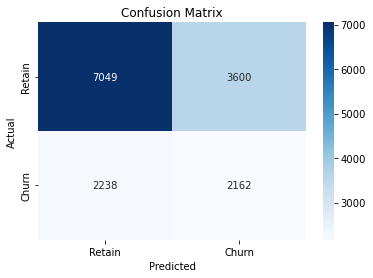

In [69]:
print(f'          Classification Report for test data')
print(classification_report(y_test, y_pred))

print_confusion_matrix(y_test,y_pred,title='Confusion Matrix')


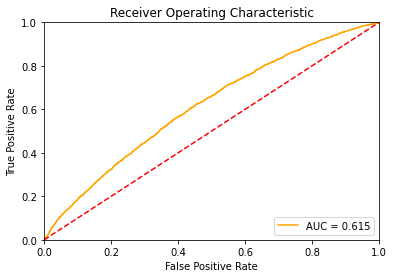

In [70]:
plot_auc(y_test, X_test_prob)

In [71]:
print(f'AUC Score: {metrics.roc_auc_score(y_test,X_test_prob[:,1])}')

AUC Score: 0.6149276500567702


#### <mark>Interpretation of Performance of Logistic Regression Model
For our model, we selected the AUC score (0.615) as most important metric to evaluate our model performance.<br> 
0.5 < AUC < 1 indicates that our model is able to detect more numbers of true positives (churn predicted correctly) and true negatives (retain predicted correctly) than false negatives and false positives.

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


### Hyperparameter Tuning of Random Forest Classification model 

We employed a grid search cross-validation function to estimate the best parameters for our model.

In [72]:
# Run GridSearchCV to loop through predefined hyperparameters and 
# fit our estimator (model) on train/test set. 

# Change this parameter to decide whether to run the RFC gridsearch
run_rfc_gridsearch=False

# Run gridsearch depending on the boolean, this is to save runtime between runs of whole noteboooks. 
# Users should update the hardcoded values below after every change for optimisation of future runs.
if run_rfc_gridsearch:
    grid_rfc=rfc_gridsearch(X_train, y_train)
    rfc_best_params=grid_rfc.best_params_
else:
    # Hard coded best parameters from the previous run of gridsearch 
    #rfc_best_params={'max_depth': 64, 'n_estimators': 250}
    #rfc_best_params={'max_depth': 15, 'min_samples_leaf': 60, 'min_samples_split': 100, 'n_estimators': 10}
    rfc_best_params={'class_weight': {1: 0.6, 0: 0.4}, 'max_depth': 15, 'min_samples_leaf': 60, 'min_samples_split': 100, 'n_estimators': 300}
print(rfc_best_params)

{'class_weight': {1: 0.6, 0: 0.4}, 'max_depth': 15, 'min_samples_leaf': 60, 'min_samples_split': 100, 'n_estimators': 300}


###  Training of Random Forest Classification model   
We used the tuned hyperparameters to build our model and evaluated its performance to the train/test dataset.

In [73]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

rfcmodel = RandomForestClassifier(
    n_estimators=rfc_best_params['n_estimators'], # n_estimators = no. of decision trees
    max_depth=rfc_best_params['max_depth'],
    min_samples_leaf=rfc_best_params['min_samples_leaf'],
    min_samples_split=rfc_best_params['min_samples_split'],
    class_weight=rfc_best_params['class_weight'],
    random_state=33) # random_state: assigning a random state to retain stability

rfcmodel.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=15,
                       min_samples_leaf=60, min_samples_split=100,
                       n_estimators=300, random_state=33)

In [74]:
#-------------------------------- Model testing ---------------------------------#

# Type your code here to predict for X_test data set using the fitted RF model
y_rfc_pred = rfcmodel.predict(X_test)
y_rfc_train_pred = rfcmodel.predict(X_train)

# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
rfc_probabilities = rfcmodel.predict_proba(X_test)
rfc_train_probabilities= rfcmodel.predict_proba(X_train)

X_test_prob_rfc = score_model(rfc_probabilities, 0.5)
X_train_prob_rfc = score_model(rfc_train_probabilities, 0.5)

# Display probabilities in a table
pd.DataFrame(X_test_prob, columns = ["Retained", "Probability of Churn"])  

,Retained,Probability of Churn
0,0.551849,0.448151
1,0.732324,0.267676
2,0.768192,0.231808
3,0.548202,0.451798
4,0.530784,0.469216
...,...,...
15044,0.559131,0.440869
15045,0.522565,0.477435
15046,0.605682,0.394318
15047,0.582307,0.417693


### Evaluating performance of Random Forest Classification model
We used several performance metrics to evaluate our model against train/test dataset, as follows:
GINI, AUC, Precision, Recall, and Confusion matrix

In [75]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, AUC, Precision, Recall, confusion matrix
# Evaluation metrics
print(f'                  RFC model scores comparison')

rfc_test_score_df,rfc_test_split_df=get_score_display(y_test, y_rfc_pred,rfc_probabilities)
rfc_train_score_df,rfc_train_split_df=get_score_display(y_train, y_rfc_train_pred,rfc_train_probabilities)

display_model_comparisons(rfc_train_score_df,rfc_train_split_df,rfc_test_score_df,rfc_test_split_df)

                  RFC model scores comparison


Test,Score
Accuracy Score,0.747565
Precision Score,0.723780
Recall Score,0.187855
F1 Score,0.298290
Mean Absolute Error,0.252435
Mean Squared Error,0.252435
Root Mean Squared Error,0.502429
AUC Score,0.762245
GINI Score,0.230226
Test,Score


 Comparing scores after splitting postive and negative


Test,Negative,Positive
Cases,25085,10029
Precision,0.74947,0.72378
Recall,0.97134,0.18786
F1,0.84610,0.29829
Test,Negative,Positive
Cases,10649,4400
Precision,0.72563,0.54980
Recall,0.95840,0.12295
F1,0.82593,0.20097


#### <mark>Interpretation:
From the comparison tables above, the performance metric scores are higher in the train data than in the test data, suggesting some semblance of overfitting. <br>
However, the AUC score of RFC model for the test data is 0.67, significantly higher than that of Logistic Regression model.<br> 
This means our RFC model performs better than our Logistic Regression model. 

          Classification Report for test data
              precision    recall  f1-score   support

           0       0.73      0.96      0.83     10649
           1       0.55      0.12      0.20      4400

    accuracy                           0.71     15049
   macro avg       0.64      0.54      0.51     15049
weighted avg       0.67      0.71      0.64     15049



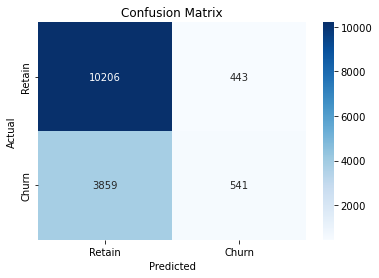

In [76]:
print(f'          Classification Report for test data')
print(classification_report(y_test, y_rfc_pred))
print_confusion_matrix(y_test,y_rfc_pred,title='Confusion Matrix')

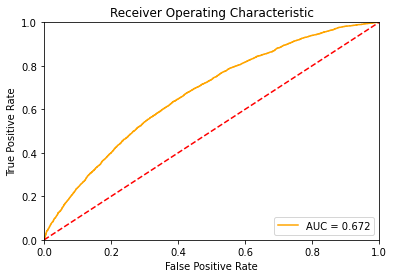

In [77]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

# Plot ROC Curve
plot_auc(y_test, rfc_probabilities)


#### <mark>Interpretation of Performance of Random Forest Classification (RFC) model

For our RFC model, we selected the AUC score (0.672) as most important metric to evaluate our model performance.<br>
0.5 < AUC < 1 indicates that our model is able to detect more numbers of true positives (churn predicted correctly) and true negatives (retain predicted correctly) than false negatives and false positives.

### <mark> Performance Comparison between Logistic Regression (LR) and Random Forest Classifier (RFC)
For the churn prediction purpose, we built two prediction models: LR and RFC. <br>
For both models, we split the data into 70/30 for train/test sets and optimized the model hyperparameters.<br> 
The RFC model yields higher AUC scores (0.672) than the LR model does. 

Accuracy score for Logistic Regression Model         : 0.612
Accuracy score for Random Forest Classification Model: 0.714


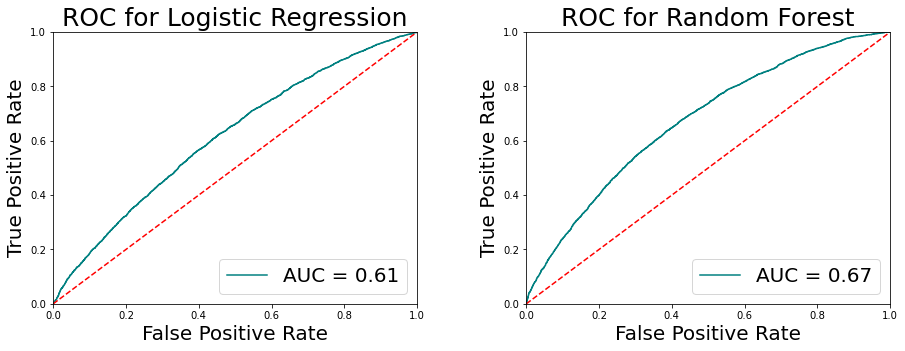

In [78]:
labels=y_test
ax1prob = X_test_prob
ax2prob = rfc_probabilities

fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 5))
plt.subplots_adjust(wspace = 0.3)


# LR graph
fpr, tpr, threshold = metrics.roc_curve(labels, ax1prob[:,1])
auc = metrics.auc(fpr, tpr)

ax1.set_title('ROC for Logistic Regression', size= 25)
ax1.plot(fpr, tpr, color = 'Teal',label = f'AUC = {auc:.2f}')
ax1.legend(loc = 'lower right',fontsize=20)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate',size=20)
ax1.set_xlabel('False Positive Rate',size=20)

# RFC Graph
fpr, tpr, threshold = metrics.roc_curve(labels, ax2prob[:,1])
auc = metrics.auc(fpr, tpr)

ax2.set_title('ROC for Random Forest', size= 25)
ax2.plot(fpr, tpr, color = 'Teal',label = f'AUC = {auc:.2f}')
ax2.legend(loc = 'lower right',fontsize=20)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('True Positive Rate',size=20)
ax2.set_xlabel('False Positive Rate',size=20);

print(f'Accuracy score for Logistic Regression Model         : {metrics.accuracy_score(y_test, y_pred):.3f}')
print(f'Accuracy score for Random Forest Classification Model: {metrics.accuracy_score(y_test, y_rfc_pred):.3f}');


### Q4.3 Identify most important features impacting churn

In [79]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

rfc_impt=pd.Series(rfcmodel.feature_importances_, index=X.columns).sort_values(ascending=False)
print(rfc_impt)

CurrentEquipmentDays         0.158617
MonthsInService              0.119805
PercChangeMinutes            0.064779
MonthlyMinutes               0.060454
perc_recurrent_charge        0.046425
TotalRecurringCharge         0.032259
perc_overage_mins            0.029976
MonthlyRevenue               0.029503
PercChangeRevenues           0.029437
PeakCallsInOut               0.028511
OffPeakCallsInOut            0.027999
AgeHH1                       0.025480
InboundCalls                 0.023841
UnansweredCalls              0.022996
OutboundCalls                0.022500
ServiceArea                  0.022062
DroppedBlockedCalls          0.021926
OverageMinutes               0.019343
DroppedCalls                 0.018643
CreditRating                 0.018499
MadeCallToRetentionTeam      0.013884
HandsetPrice                 0.013855
CustomerCareCalls            0.012893
AgeHH2                       0.012660
IncomeGroup                  0.012646
HandsetRefurbished           0.011363
HandsetModel

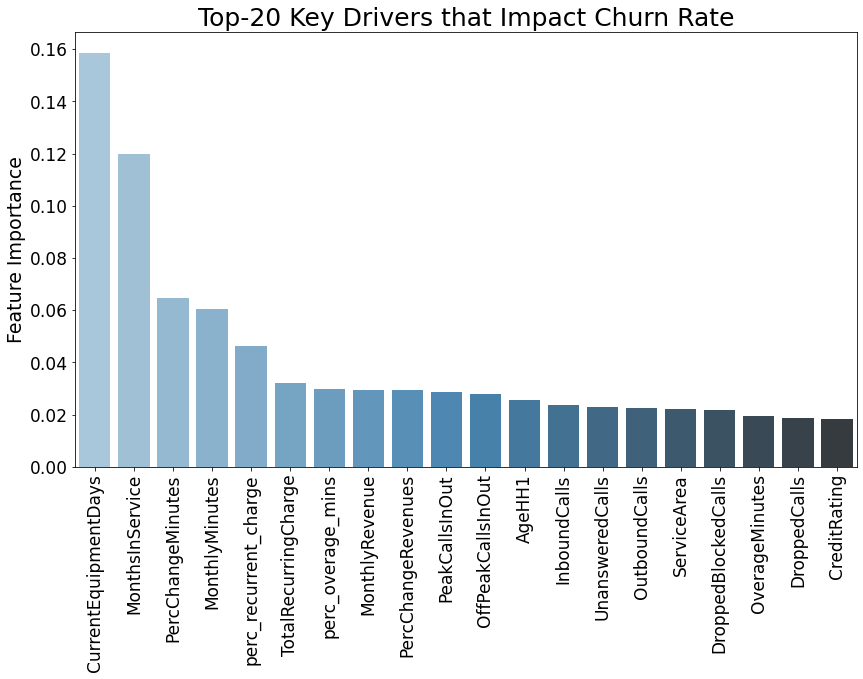

In [80]:
rfc_top20=rfc_impt.sort_values(ascending=False)[0:20]

plt.figure(figsize=(14,8))
plt.xticks(rotation=90);
plt.title("Top-20 Key Drivers that Impact Churn Rate",size=25)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.ylabel("Feature Importance",size=19)
sns.barplot(x=rfc_top20.index,
            y=rfc_top20.values,
            palette = ("Blues_d"));

### <mark>Key Drivers that Impact Churn Rate
Using the Random Forest Classifier (RFC) model, we identified the Top-20 features that affect the churn rate as shown above.<br>The feature that most influences churn rate is **the number of days since the activation of customers' current equipment** (CurrentEquipmentDays).

## Additional Exploration

### Testing of Logistic Regression and Random Forest Classifier models with only Top-20 important features
In this section, we ran both models with only 20 most-important features and tested whether the models would improve.

In [81]:
# X = Independent variables
# Y = Dependent (target) variable, that is Churn.
X_top = cust_df[rfc_top20.index]
y_top = cust_df['Churn']

# Train-test-split: Test with 30% of available data 
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top, y_top, 
                                                    test_size=0.3, 
                                                    #stratify=y,
                                                    random_state=33)

#Feature scaling for all continuous variable
scalerx_top = StandardScaler().fit(X_top)
X_top_train = pd.DataFrame(scalerx_top.transform(X_top_train),columns=X_top.columns)
X_top_test = pd.DataFrame(scalerx_top.transform(X_top_test),columns=X_top.columns)

In [82]:
# For fairness sake, we shall run the model with the same parameters used above.

lr_top= LogisticRegression(C = lr_best_params['C'],
                       penalty = lr_best_params['penalty'],
                       class_weight = lr_best_params['class_weight'],
#                       solver = "saga",
                       random_state=33)
lr_top.fit(X_top_train, y_top_train)

rfcmodel_top = RandomForestClassifier(
    n_estimators=rfc_best_params['n_estimators'], # n_estimators = no. of decision trees
    max_depth=rfc_best_params['max_depth'],
    min_samples_leaf=rfc_best_params['min_samples_leaf'],
    min_samples_split=rfc_best_params['min_samples_split'],
    class_weight=rfc_best_params['class_weight'],
    random_state=33) # random_state: assigning a random state to retain stability

rfcmodel_top.fit(X_top_train,y_top_train)

LogisticRegression(C=0.01, class_weight={0: 0.3, 1: 0.7}, random_state=33)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=15,
                       min_samples_leaf=60, min_samples_split=100,
                       n_estimators=300, random_state=33)

In [83]:
y_top_pred=lr_top.predict(X_top_test)
y_top_rfc_pred = rfcmodel_top.predict(X_top_test)
X_top_prob=lr_top.predict_proba(X_top_test)
X_top_rfc_prob= rfcmodel_top.predict_proba(X_top_test)

In [84]:

print(f'Accuracy score for Logistic Regression Model                 : {metrics.accuracy_score(y_test, y_pred):.3f}')
print(f'AUC Score for Logistic Regression Model                      : {metrics.roc_auc_score(y_test, X_test_prob[:,1]):3f}')
print(f'Accuracy score for Random Forest Classification Model        : {metrics.accuracy_score(y_test, y_rfc_pred):.3f}');
print(f'AUC Score for Random Forest Classification Model             : {metrics.roc_auc_score(y_test, rfc_probabilities[:,1]):3f}')
print('\n')
print(f'Accuracy score for Top 20 Logistic Regression Model          : {metrics.accuracy_score(y_top_test, y_top_pred):.3f}')
print(f'AUC Score for Top 20 Logistic Regression Model               : {metrics.roc_auc_score(y_test, X_top_prob[:,1]):3f}')
print(f'Accuracy score for Top 20 Random Forest Classification Model : {metrics.accuracy_score(y_top_test, y_top_rfc_pred):.3f}');
print(f'AUC Score for Top 20 Random Forest Classification Model      : {metrics.roc_auc_score(y_test, X_top_rfc_prob[:,1]):3f}')

Accuracy score for Logistic Regression Model                 : 0.612
AUC Score for Logistic Regression Model                      : 0.614928
Accuracy score for Random Forest Classification Model        : 0.714
AUC Score for Random Forest Classification Model             : 0.671962


Accuracy score for Top 20 Logistic Regression Model          : 0.597
AUC Score for Top 20 Logistic Regression Model               : 0.597265
Accuracy score for Top 20 Random Forest Classification Model : 0.713
AUC Score for Top 20 Random Forest Classification Model      : 0.669336


### Performance of Logistic Regression (LR) and Random Forest Classifier (RFC) models with only Top-20 important features
Using only Top-20 most important features,  
- the AUC scores for LR model decreases by 2.9%, from 0.615 (using all features) to 0.597 (using only top-20 features)
- the AUC scores for RFC model, decreases by 0.4%, from 0.672 (using all features) to 0.669 (using only top-20 features)

### Testing with Oversampling
In the next section, we will try running the Random Forest Classifier with oversampling to test if the accuracy will improve.

In [85]:

os_X_train, os_y_train = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1).fit_resample(X_train, y_train)

In [87]:
# Run GridSearchCV to loop through predefined hyperparameters and 
# fit our estimator (model) on train/test set. 

# Change this parameter to decide whether to run the RFC gridsearch
run_os_rfc_gridsearch=False

# Run gridsearch depending on the boolean, this is to save runtime between runs of whole noteboooks. 
# Users should update the hardcoded values below after every change for optimisation of future runs.
if run_os_rfc_gridsearch:
    os_grid_rfc=rfc_gridsearch(os_X_train, os_y_train)
    rfc_best_params=os_grid_rfc.best_params_
else:
    # Hard coded best parameters from the previous run of gridsearch 
    os_rfc_best_params={'class_weight':{1: 0.6, 0: 0.4}, 'max_depth': 15, 'min_samples_leaf': 60, 'min_samples_split': 100, 'n_estimators': 300}
print(os_rfc_best_params)


{'class_weight': {1: 0.6, 0: 0.4}, 'max_depth': 15, 'min_samples_leaf': 60, 'min_samples_split': 100, 'n_estimators': 300}


In [89]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
# Parameters from a grid search done previously
os_rfcmodel = RandomForestClassifier(
    n_estimators=os_rfc_best_params['n_estimators'], # n_estimators = no. of decision trees
    max_depth=os_rfc_best_params['max_depth'],
    min_samples_leaf=os_rfc_best_params['min_samples_leaf'],
    min_samples_split=os_rfc_best_params['min_samples_split'],
    class_weight=os_rfc_best_params['class_weight'],
    random_state=33) # random_state: assigning a random state to retain stability

os_rfcmodel.fit(os_X_train, os_y_train)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=15,
                       min_samples_leaf=60, min_samples_split=100,
                       n_estimators=300, random_state=33)

In [90]:
os_y_rfc_pred = os_rfcmodel.predict(X_test)
os_X_rfc_prob= os_rfcmodel.predict_proba(X_test)

print(f'Accuracy score for Random Forest Classification Model                     : {metrics.accuracy_score(y_test, y_rfc_pred):.3f}');
print(f'AUC Score for Random Forest Classification Model                          : {metrics.roc_auc_score(y_test, rfc_probabilities[:,1]):3f}')
print('\n')
print(f'Accuracy score for Random Forest Classification Model with oversampling   : {metrics.accuracy_score(y_test, os_y_rfc_pred):.3f}')
print(f'AUC Score for Top 20 Random Forest Classification Model with oversampling : {metrics.roc_auc_score(y_test, os_X_rfc_prob[:,1]):3f}')

Accuracy score for Random Forest Classification Model                     : 0.714
AUC Score for Random Forest Classification Model                          : 0.671962


Accuracy score for Random Forest Classification Model with oversampling   : 0.554
AUC Score for Top 20 Random Forest Classification Model with oversampling : 0.639197


          Classification Report for test data
              precision    recall  f1-score   support

           0       0.80      0.49      0.61     10649
           1       0.37      0.71      0.48      4400

    accuracy                           0.55     15049
   macro avg       0.58      0.60      0.55     15049
weighted avg       0.68      0.55      0.57     15049



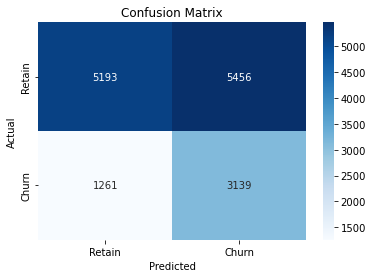

In [91]:
print(f'          Classification Report for test data')
print(classification_report(y_test, os_y_rfc_pred))
print_confusion_matrix(y_test,os_y_rfc_pred,title='Confusion Matrix')

### Performance of Random Forest Classifier model with Oversampling
We found out that employing oversampling does not improve the accuracy score or the AUC score.

## Q5. Use hold out data provided to predict churners using the best model identified in Q4 

In [92]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object

In [93]:
# Edit the file location of raw data set
holdout_df = pd.read_csv("Mini_project_3_Hold_Out_Data.xls")
holdout_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No


### <mark>Data Treatment
We treated the holdout data in the same way as we did to the train/test data.

In [94]:
# Check for zero or negative monthly revenue

zero_mr=holdout_df.loc[holdout_df['MonthlyRevenue']==0]
negative_mr=holdout_df.loc[holdout_df['MonthlyRevenue']<0]
print('There are %.f customers with zero monthly revenue' % (zero_mr.shape[0]))
print('There are %.f customers with negative monthly revenue' % (negative_mr.shape[0]))

There are 2 customers with zero monthly revenue
There are 0 customers with negative monthly revenue


In [95]:
# Exclude the customers with zero and negative monthly revenue from holdoutdata and from any subsequent analysis

drop_df_rows(holdout_df,zero_mr)
drop_df_rows(holdout_df,negative_mr)

Shape before dropping: (20000, 58)
Shape after dropping: (19998, 58)
2 rows dropped

Shape before dropping: (19998, 58)
Shape after dropping: (19998, 58)
0 rows dropped



In [96]:
# Display columns and their respective sum of null values 
df_isnull_cols(holdout_df)

            Total Null Values in Columns

              COLUMN NAME        SUM
                    Churn      19998
           MonthlyRevenue         60
           MonthlyMinutes         60
     TotalRecurringCharge         60
    DirectorAssistedCalls         60
           OverageMinutes         60
             RoamingCalls         60
        PercChangeMinutes        134
       PercChangeRevenues        134
              ServiceArea          4
                   AgeHH1        335
                   AgeHH2        335




In [97]:
# Drop the CustomerID and Churn columns as they will not form part of the model.
holdout_df.drop(["CustomerID", "Churn"], axis = 1, inplace = True)

In [98]:
# Drop rows with zero monthly revenue.
null_mr=holdout_df.loc[holdout_df['MonthlyRevenue'].isnull()]
drop_df_rows(holdout_df,null_mr,inplace=True)

# Replace NaN values in the following features with their mode value (0)
holdout_df.PercChangeMinutes.replace(np.nan,0,inplace=True)
holdout_df.PercChangeRevenues.replace(np.nan,0,inplace=True)
holdout_df.AgeHH1.replace(np.nan,0,inplace=True)
holdout_df.AgeHH2.replace(np.nan,0,inplace=True)

# Replace the NaN values of Service Area feature with their mode value
holdout_df.ServiceArea.replace(np.nan,holdout_df["ServiceArea"].mode()[0],inplace=True)

# Display columns and their respective sum of null values 
df_isnull_cols(holdout_df)

Shape before dropping: (19998, 56)
Shape after dropping: (19938, 56)
60 rows dropped

No Null Values Found




In [99]:
#Create addditional features
holdout_df=create_features(holdout_df)
print(holdout_df.shape)

# Since addtional features were added, we should check for null values again.
df_isnull_cols(holdout_df)

(19938, 59)
            Total Null Values in Columns

              COLUMN NAME        SUM
        perc_overage_mins        293




In [100]:
holdout_df.perc_overage_mins.replace(np.nan,0,inplace=True)

### <mark>Encoding of Holdout Data
Here we encoded the holdout data in the same way as we did to the train/test data.

In [101]:
# Encoding Credit Rating feature
# Take the first digit in the string and convert it to an integer
holdout_df['CreditRating']=holdout_df['CreditRating'].astype(str).str[0].astype(int)
holdout_df['CreditRating'].describe()


count    19938.000000
mean         2.891965
std          1.588431
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          7.000000
Name: CreditRating, dtype: float64

In [102]:
numericals=['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'CreditRating'
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating']


categoricals=['ServiceArea', 
              'HandsetPrice', 
              'PrizmCode', 
              'Occupation', 
              'MaritalStatus']


binaries= ['ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']


In [103]:
lb = LabelBinarizer()
le = LabelEncoder()

for x in binaries:
    holdout_df[x] = lb.fit_transform(holdout_df[x])

for x in categoricals:
    holdout_df[x] = le.fit_transform(holdout_df[x])

holdout_df.dtypes.value_counts()
display(holdout_df)

float64    26
int32      22
int64      11
dtype: int64

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,311,7,6,240,30.0,0.0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,5,0,1,3,0,5,0,3,0,1.000000,0.643590,0.047619
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,388,6,4,434,56.0,0.0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,6,0,2,14,0,1,0,4,0,1.000000,1.303639,0.000000
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,311,3,3,700,38.0,24.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4,0,3,0,0,3,2,1,2,1.000000,0.513663,0.404235
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,636,6,5,48,46.0,0.0,1,0,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,4,0,1,5,0,1,0,3,0,0.666667,0.842933,0.104575
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,500,4,4,408,58.0,0.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,3,0,0,0,0,1,2,3,0,1.000000,0.904650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19987,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,1.7,0.0,0.0,0.7,1.0,0.0,0.0,0.0,30,1,1,244,1,1,886,40.0,0.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,6,0,0,15,0,1,2,4,0,1.000000,1.000589,0.000000
19989,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,0.3,18.3,0.0,0.0,26.6,0.7,0.0,76.3,35.0,5.3,0.0,0.0,33,1,1,250,3,3,254,38.0,44.0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,6,0,0,3,0,4,0,3,2,1.000000,0.717017,0.088319
19991,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,0.3,24.0,0.0,0.0,176.7,86.7,16.7,186.7,92.3,10.0,0.0,5.0,31,1,1,273,4,4,380,52.0,42.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,6,0,1,8,0,3,0,4,0,1.000000,1.013111,0.000000
19992,49.99,361.0,50.0,0.00,0.0,0.0,0.0,0.0,4.3,0.3,16.3,0.0,0.0,94.5,67.3,10.0,90.7,60.7,4.7,0.0,0.7,32,1,1,364,2,2,45,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,0,3,0,3,1,1.000000,1.000200,0.000000


In [104]:
# Drop the same features that were calculated previously to be highly-correlated.

correlated_features={'ActiveSubs', 'BuysViaMailOrder', 'RetentionCalls', 'BlockedCalls', 'HasCreditCard', 'ReceivedCalls', 'Handsets'}

holdout_df.drop(correlated_features, axis=1, inplace=True)

display(cust_df.shape)
display(holdout_df.shape)

(50163, 53)

(19938, 52)

### <mark> Applying Random forest Classification (RFC) model to Holdout Data
Our RFC model is more accurate than our Logistic Regression (LR) model. Therefore, we used RFC model to predict churn from  holdout data.

In [105]:
holdout_sc=scalerx.transform(holdout_df)
#holdout_sc= pd.DataFrame(holdout_sc, columns = X.columns)

holdout_pred= rfcmodel.predict(holdout_sc)
holdout_proba= rfcmodel.predict_proba(holdout_sc)
holdout_proba=pd.DataFrame(holdout_proba, columns = ["Retained", "Probability of Churn"])  

In [106]:
# Count the percentage of retained and churners probability
holdout_retained = holdout_proba["Retained"].sum() / len(holdout_proba) 
holdout_proba_pred = holdout_proba["Probability of Churn"].sum() / len(holdout_proba) 

print(f'Churn Rate Prediction')
print(f'Retain   : {holdout_retained*100:.2f}%')
print(f'Churn    : {holdout_proba_pred*100:.2f}%')

Churn Rate Prediction
Retain   : 63.56%
Churn    : 36.44%


In [107]:
# Show summary of descriptive statistics of Prob. of Churn
holdout_proba["Probability of Churn"].describe()

count    19938.000000
mean         0.364379
std          0.098440
min          0.083960
25%          0.300387
50%          0.371852
75%          0.432828
max          0.708070
Name: Probability of Churn, dtype: float64

### <mark>Summary of Churn Prediction in Holdout Data  
We applied Random Forest Classifier model to the holdout data to predict churners. We predicted that the probability of churn in the holdout data is 36.44%.

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [108]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

In [109]:
# Use Random Forest Classifier model as estimator
rfc_proba = rfcmodel.predict_proba(X_test)

# Create the start of the gain table
cols = ["Actual Churn", "Predicted Churn Probabilty"] 
data = [y_test, rfc_proba[::, 1]]
lift_df= pd.DataFrame(dict(zip(cols, data)))
display(lift_df.sort_values('Predicted Churn Probabilty',ascending=False))

,Actual Churn,Predicted Churn Probabilty
22317,1,0.713079
43567,1,0.711170
39156,1,0.701293
24580,0,0.697341
25924,1,0.697143
...,...,...
47162,0,0.092157
45966,1,0.090858
38809,0,0.089089
38998,0,0.086350


In [110]:
# Split the dataset into ten slices based on the probability
lift_df['Deciles']=pd.qcut(lift_df['Predicted Churn Probabilty'],q=10)
display(lift_df)

,Actual Churn,Predicted Churn Probabilty,Deciles
38857,1,0.147400,"(0.0847, 0.232]"
33243,0,0.209160,"(0.0847, 0.232]"
5,0,0.266955,"(0.232, 0.281]"
23931,0,0.427970,"(0.423, 0.45]"
49226,0,0.236029,"(0.232, 0.281]"
...,...,...,...
33513,0,0.410147,"(0.399, 0.423]"
30896,0,0.437591,"(0.423, 0.45]"
11229,1,0.354346,"(0.349, 0.376]"
3398,0,0.336184,"(0.319, 0.349]"


In [111]:
# Aggregate the dataset by the ten slices
lift_df_grp=lift_df.groupby("Deciles").agg(["count", "sum"])["Actual Churn"].sort_index(ascending = False)
# Assign column names for readibility
lift_df_grp.columns=['Total Customers','Total Churn']

display(lift_df_grp)

,Total Customers,Total Churn
Deciles,,
"(0.483, 0.713]",1505,781
"(0.45, 0.483]",1505,633
"(0.423, 0.45]",1505,597
"(0.399, 0.423]",1505,510
"(0.376, 0.399]",1504,455
"(0.349, 0.376]",1505,405
"(0.319, 0.349]",1505,340
"(0.281, 0.319]",1505,309
"(0.232, 0.281]",1505,244


In [112]:
# Add features to calculate gain and lift
lift_df_grp['Cumulative Total Customers']=lift_df_grp['Total Customers'].cumsum()
lift_df_grp['Cumulative Churn']=lift_df_grp['Total Churn'].cumsum()
lift_df_grp['Percentage Churned']=lift_df_grp['Total Churn']/lift_df_grp['Total Churn'].sum()*100
lift_df_grp['Gain']=lift_df_grp['Percentage Churned'].cumsum()
lift_df_grp['Lift']=lift_df_grp['Gain']/list(range(10, 101,10))

display(lift_df_grp)

,Total Customers,Total Churn,Cumulative Total Customers,Cumulative Churn,Percentage Churned,Gain,Lift
Deciles,,,,,,,
"(0.483, 0.713]",1505,781,1505,781,17.750000,17.750000,1.775000
"(0.45, 0.483]",1505,633,3010,1414,14.386364,32.136364,1.606818
"(0.423, 0.45]",1505,597,4515,2011,13.568182,45.704545,1.523485
"(0.399, 0.423]",1505,510,6020,2521,11.590909,57.295455,1.432386
"(0.376, 0.399]",1504,455,7524,2976,10.340909,67.636364,1.352727
"(0.349, 0.376]",1505,405,9029,3381,9.204545,76.840909,1.280682
"(0.319, 0.349]",1505,340,10534,3721,7.727273,84.568182,1.208117
"(0.281, 0.319]",1505,309,12039,4030,7.022727,91.590909,1.144886
"(0.232, 0.281]",1505,244,13544,4274,5.545455,97.136364,1.079293


In [113]:
lift_df_grp=lift_df_grp.append(pd.Series([0, 0, 0, 0, 0, 0,0],
                             index=['Total Customers', 'Total Churn', 'Cumulative Total Customers',
                                    'Cumulative Churn', 'Percentage Churned', 'Gain', 'Lift'],
                            name=('(0,0)'))).sort_values('Gain')

# Reset the index so we can replicate the actions below as decile range might change
lift_df_grp.reset_index(inplace=True)


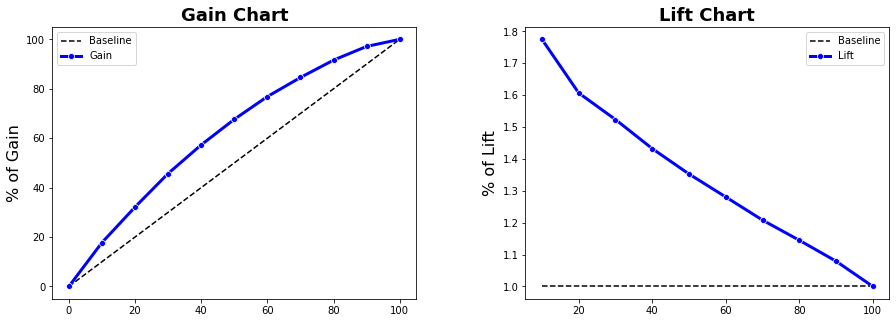

In [114]:
# Visualize the Gain and Lift Charts
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15, 5))
plt.subplots_adjust(wspace = 0.3)

# Gain Chart
g = sns.lineplot(x = list(range(0, 110, 10)), y = list(range(0, 110, 10)), 
                 ax = ax1, ls = "--", color = "black",
                 label = "Baseline")
g = sns.lineplot(x = list(range(0, 110, 10)), y = lift_df_grp["Gain"], 
                 ax = ax1, lw = 3, label = "Gain",
                 color = "Blue", marker = "o")
ax1.set_ylim(-5, 105)
ax1.set_title("Gain Chart", weight = "bold", fontsize = 18)
ax1.set_ylabel("% of Gain", size = 16);


# Lift Chart
g = sns.lineplot(x = list(range(10, 110, 10)), y = np.repeat(1, 10), 
                 ax = ax2, ls = "--", color = "black",
                 label = "Baseline")
g = sns.lineplot(x = list(range(10, 110, 10)), y = lift_df_grp["Lift"][1:], 
                 ax = ax2, lw = 3, label = "Lift",
                 color = "Blue", marker = "o")
ax2.set_title("Lift Chart", weight = "bold", fontsize = 18)
ax2.set_ylabel("% of Lift", size = 16);


In [115]:
# target_index=lift_df_grp.index.get_loc[pd.Interval('0.392, 0.436')]

target_index=2 #index postion of the 20th percentile
grand_total_customers=lift_df_grp['Total Customers'].sum()
actual_churn_20=(lift_df_grp.iloc[target_index]['Cumulative Churn']/grand_total_customers)

grand_total_MonthlyRevenue=cust_df["MonthlyRevenue"].sum()  
lift_20=lift_df_grp.iloc[target_index]['Lift']
mr_top20_lift=round(grand_total_MonthlyRevenue * actual_churn_20 * lift_20, 2)

print(f'Total Customers in model                   : {grand_total_customers}')
print(f'Probability of churners in top 20%         : {actual_churn_20:.6f}')
print(f'Total Monthly Revenue from model           : {grand_total_MonthlyRevenue:.2f}')
print(f'Lift at 20%                                : {lift_20:.3f}')
print(f'Total monthly revenue if we target top 20% : {mr_top20_lift:.2f}')


Total Customers in model                   : 15049
Probability of churners in top 20%         : 0.093960
Total Monthly Revenue from model           : 2900744.42
Lift at 20%                                : 1.607
Total monthly revenue if we target top 20% : 437943.38


### <mark>Lift Chart Results

**Question:** Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model.

**Result:** By targeting top 20% of the churners, we estimate that the total monthly revenue saved could be about $437,000. 
